# DeepDream Starter 🚀

Welcome! This notebook is your hands-on introduction to DeepDream, the algorithm that turns ordinary images into wild, dream-like art using neural networks.

Here’s what you’ll find inside:
- **How DeepDream works:** See how we use a pre-trained ResNet50 to amplify patterns in your images, step by step. You could possibly use any other model you want!
- **Single-image DeepDream:** Apply the algorithm to your own images and compare the before/after results side by side.
- **Reference image dreaming:** Use one image to “dream” features onto another.
- **Image classification:** Check how a neural network’s predictions change before and after DeepDreaming.
- **Next steps:** Get ideas for making your dreams even weirder with tricks like image pyramids and gradient smoothing.

<a href="https://www.kaggle.com/code/vladislavlassa/deepdream-starter?scriptVersionId=244334574" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg">
</a>

# Setting things up 🔨

In [31]:
# get ImageNet classes text
!git clone https://gist.github.com/4e1342c10a71981d0b491e1b8227328b.git image_net_classes

# clone the repo with code
!git clone --single-branch --branch basic-deepdream https://github.com/Lassa30/deepdreaming

# create output directory
!mkdir output

fatal: destination path 'image_net_classes' already exists and is not an empty directory.
fatal: destination path 'deepdreaming' already exists and is not an empty directory.
mkdir: cannot create directory ‘output’: File exists


## Imports

In [32]:
import sys
import os
sys.path.append("/kaggle/working/deepdreaming")
########################################################################
from deepdreaming import img
from deepdreaming import display
from deepdreaming.utils import read_image_net_classes
from deepdreaming import deepdream as dd


import numpy as np
from matplotlib import pyplot as plt

import torch
from torchvision.models import resnet50, vgg16
from torchvision.models import ResNet50_Weights, VGG16_Weights

import cv2 as cv
########################################################################
SEED = 42
def set_seeds(seed_value):
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seeds(SEED)
########################################################################
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Constants

In [33]:
TARGET_SHAPE = (224, 224, 3)

IMAGE_NET_CLASSES_PATH = "input/image_net_classes/imagenet_classes.txt"
INPUT_IMAGES_DIR = "input/deepdream-sample-images"
OUTPUT_IMAGES_DIR = "output"

assert os.path.exists(IMAGE_NET_CLASSES_PATH), "Please provide a valid `IMAGE_NET_CLASSES_PATH`"
assert os.path.exists(INPUT_IMAGES_DIR), "Please provide a valid `INPUT_IMAGES_DIR`"
assert os.path.exists(OUTPUT_IMAGES_DIR), "Please provide a valid `DEEPDREAM_OUTPUT_PATH`"


device = "cuda" if torch.cuda.is_available() else "cpu"
MODEL = vgg16(weights=VGG16_Weights.IMAGENET1K_V1).to(device).eval()
MODEL.requires_grad_(False);
IMAGE_NET_CLASSES = read_image_net_classes(IMAGE_NET_CLASSES_PATH)

# DeepDream 🎨

## Single image
**Applying DeepDream algorithm to each image and comparing it to itself before DeepDream**

IMAGE PYRAMID RUNNING
Input image shape
(56, 56, 3)
Input image shape
(112, 112, 3)
Input image shape
(224, 224, 3)
IMAGE PYRAMID STOPPED


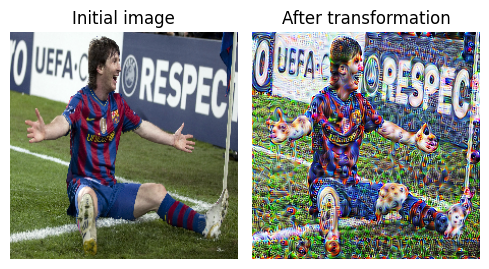

IMAGE PYRAMID RUNNING
Input image shape
(56, 56, 3)
Input image shape
(112, 112, 3)
Input image shape
(224, 224, 3)
IMAGE PYRAMID STOPPED


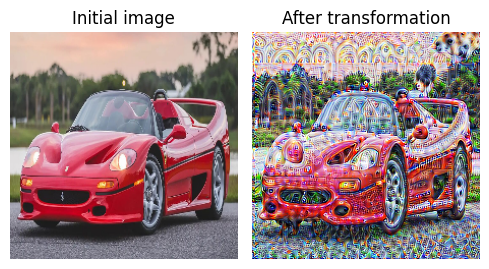

IMAGE PYRAMID RUNNING
Input image shape
(56, 56, 3)
Input image shape
(112, 112, 3)
Input image shape
(224, 224, 3)
IMAGE PYRAMID STOPPED


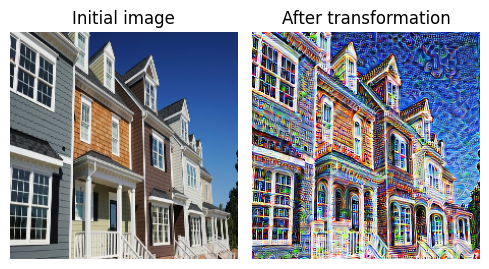

IMAGE PYRAMID RUNNING
Input image shape
(56, 56, 3)
Input image shape
(112, 112, 3)
Input image shape
(224, 224, 3)
IMAGE PYRAMID STOPPED


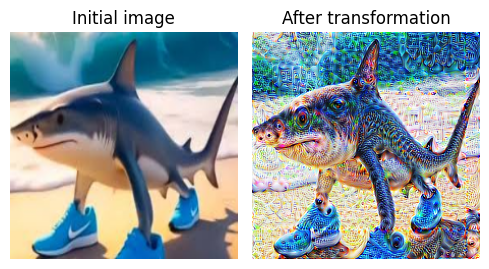

IMAGE PYRAMID RUNNING
Input image shape
(56, 56, 3)
Input image shape
(112, 112, 3)
Input image shape
(224, 224, 3)
IMAGE PYRAMID STOPPED


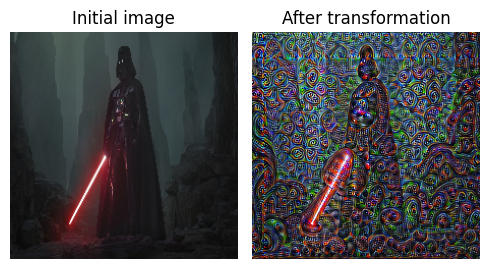

IMAGE PYRAMID RUNNING
Input image shape
(56, 56, 3)
Input image shape
(112, 112, 3)
Input image shape
(224, 224, 3)
IMAGE PYRAMID STOPPED


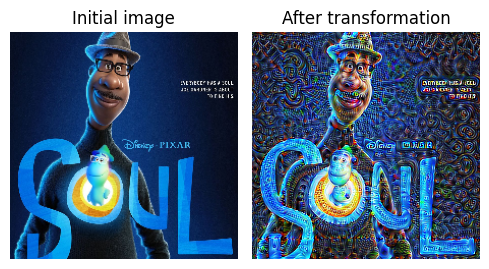

IMAGE PYRAMID RUNNING
Input image shape
(56, 56, 3)
Input image shape
(112, 112, 3)
Input image shape
(224, 224, 3)
IMAGE PYRAMID STOPPED


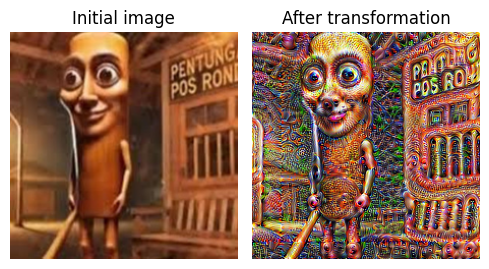

IMAGE PYRAMID RUNNING
Input image shape
(56, 56, 3)
Input image shape
(112, 112, 3)
Input image shape
(224, 224, 3)
IMAGE PYRAMID STOPPED


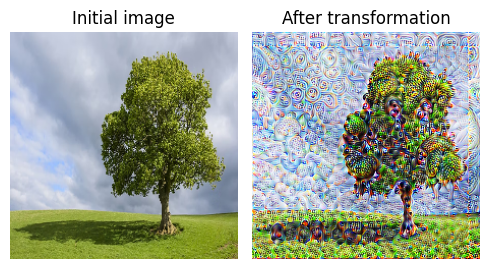

IMAGE PYRAMID RUNNING
Input image shape
(56, 56, 3)
Input image shape
(112, 112, 3)
Input image shape
(224, 224, 3)
IMAGE PYRAMID STOPPED


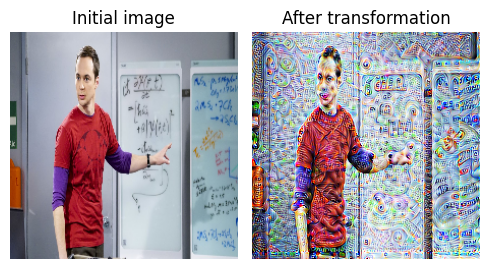

IMAGE PYRAMID RUNNING
Input image shape
(56, 56, 3)
Input image shape
(112, 112, 3)
Input image shape
(224, 224, 3)


In [ ]:
# deepdream = dd.DeepDream(MODEL, ["layer2[3].relu", "layer3[5].conv1"])
deepdream = dd.DeepDream(MODEL, ["features[20]", "features[25]"])
sample_images = [os.path.join(INPUT_IMAGES_DIR, file_name) for file_name in os.listdir(INPUT_IMAGES_DIR)]

for sample_image in sample_images:
    # read 'n' dream
    image : np.ndarray = img.io.read_image(sample_image, TARGET_SHAPE)
    out = deepdream.dream(image, image_pyramid_ratio=0.5, image_pyramid_layers=3, shift_size=32, num_iterations=30, learning_rate=0.09)

    #compare 'n' show
    display.display_two_img(image, out, figsize=(5, 5))
    plt.show()
    
    # transform for OpenCV
    out = img.proc.to_cv(out)
    # save
    file = f"{sample_image.split('/')[-1]}"
    fullpath = os.path.join(OUTPUT_IMAGES_DIR, file)
    success = cv.imwrite(fullpath, out)
    
    assert success, f"Image {fullpath} is not saved successfully..."

## Using reference image
**Dreaming with the reference image provided**

In [ ]:
get_path = lambda prefix, name: os.path.join(prefix, name)

# some experimental layer with cool results - feel free to change!
deepdream = dd.DeepDream(MODEL, ["features[15]"])

### Dart Vader + Yoda

In [ ]:
image = img.io.read_image(get_path(INPUT_IMAGES_DIR, "yoda.jpeg"), TARGET_SHAPE)
reference = img.io.read_image(get_path(INPUT_IMAGES_DIR, "dart_vader.jpeg"), TARGET_SHAPE)

out = deepdream.dream(image, reference, learning_rate=0.05, num_iterations=50)
display.display_two_img(image, out)

### Bombordiro Crocodilo + Tung Tung Tung Sahur

In [ ]:
from deepdreaming.img.io import read_image

image = read_image(get_path(INPUT_IMAGES_DIR, "bombordiro_crocodilo.jpeg"), TARGET_SHAPE)
reference = read_image(get_path(INPUT_IMAGES_DIR, "messi.jpg"), TARGET_SHAPE)

out = deepdream.dream(image, reference, learning_rate=0.05, num_iterations=50)
display.display_two_img(image, out)

### Space + Ferrari

In [ ]:
from deepdreaming.img.io import read_image

image = read_image(get_path(INPUT_IMAGES_DIR, "ferrari.jpg"), TARGET_SHAPE)
reference = read_image(get_path(INPUT_IMAGES_DIR, "space.jpeg"), TARGET_SHAPE)

out = deepdream.dream(image, reference, learning_rate=0.05, num_iterations=50)
display.display_two_img(image, out)

# Classifying images 📷

## Before DeepDream

In [ ]:
display.display_images(*display.classify_images(MODEL, sample_images, IMAGE_NET_CLASSES))

***I am so sorry, Master Yoda...***

## After DeepDream

In [ ]:
# prepare images files
DEEPDREAM_IMAGES = [
    os.path.join(OUTPUT_IMAGES_DIR, file_name)
    for file_name in os.listdir(OUTPUT_IMAGES_DIR) 
    if os.path.isfile(os.path.join(OUTPUT_IMAGES_DIR, file_name))
]

In [ ]:
# run model
display.display_images(*display.classify_images(MODEL, DEEPDREAM_IMAGES, IMAGE_NET_CLASSES))

### Next Steps ✨
I'll try these tricks in the next notebook to improve results:

1. **Add randomness** - Small shifts/noise make patterns more varied

2. **Use image pyramid** - Process multiple resolutions for better details

3. **Smooth gradients** - Reduces artifacts and keeps patterns natural

### Check further 👉 [DeepDream Tricks](https://www.kaggle.com/code/vladislavlassa/deepdream-tricks)
Even this basic DeepDream implementation can create fun and weird images!
Check the link too see which tricks might be applied!